# CREEP LIFETIME PREDICTION OF LOW-CARBON STEELS WITH ARTIFICIAL NEURAL NETWORKS
#### Authors: Giovanni Corsetti Silva & Diogo Berta Pitz
#### Contact e-mail: corsetti@ufpr.br

In [1]:
#if not installed, run "pip install {name_of_the_library_here}" (without ")
import keras
from pickle import load
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def lifetime_predictor(stress, temperature,
                C=0.004,Si=0,Mn=0,P=0,S=0,Cr=2.165,Mo=0,W=0,
           Ni=0,Cu=0,V=0,Nb=0,N=0,Al=0,B=0,Co=0,Ta=0,O=0,Re=0,
          Normtemp=293,Normtime=0,Normcoo=1,
          Temptemp=822,Temptime=0,Tempcoo=1,
          Anntemp=293,Anntime=0,Anncoo=1):
    """
    This function gets as inputs the chemical compositions,
    thermal treatment conditions and working conditions and outputs 
    the creep lifetime in hours.
    *stress*
    recommended range: 18 - 544 MPa
    *Temperature *
    recommended range: 723 - 977 K
    *C = Carbon* 
    default=0.004
    recommended range: 0.004 - 0.23 wt%
    *Si = Silicon* 
    default = 0
    recommended range: 0 - 0.86 wt%
    *Mn = Manganese* 
    default=0
    recommended range: 0 - 0.92 wt%
    *P = Phosphorus*
    default=0
    recommended range: 0 - 0.029 wt%
    *S = Sulphur* 
    default=0
    recommended range: 0 - 0.02 wt%
    *Cr = Chromium* 
    default=2.165
    recommended range: 2.165 - 12.9 wt%
    *Mo = Molybdenum* 
    default=0
    recommended range: 0 - 2.99 wt%
    *W = Tungsten* 
    default=0
    recommended range: 0 - 3.93 wt%
    *Ni = Nickel* 
    default=0
    recommended range: 0 - 2.9 wt%
    *Cu = Copper* 
    default=0
    recommended range: 0 - 0.87 wt%
    *V = Vanadium* 
    default=0
    recommended range: 0 - 0.28 wt%
    *Nb = Niobium* 
    default=0
    recommended range: 0 - 0.312 wt%
    *N = Nitrogen* 
    default=0
    recommended range: 0 - 0.165 wt%
    *Al = Aluminium* 
    default=0
    recommended range: 0 - 0.057 wt%
    *B = Boron* 
    default=0
    recommended range: 0 - 0.051 wt%
    *Co = Cobalt* 
    default=0
    recommended range: 0 - 3.9 wt%
    *Ta = Tantalum* 
    default=0
    recommended range: 0 - 0.18 wt%
    *O = Oxygen* 
    default=0
    recommended range: 0 - 0.035 wt%
    *Re = Rhenium* 
    default=0
    recommended range: 0 - 1.69 wt%
    *Normtemp = Normalising temperature* 
    default = 293 K
    recommended range: 293 - 1,453 K
    *Normtime = Normalising time*
    default = 0 
    recommended range: 0 - 33 h
    *Normcoo = Normalising cooling method*
    default = 1 (air cooling)
    recommended range: 0 for furnace cooling
                       1 for air cooling
                       2 for oil quench
                       3 for water quench
    
    *Temptemp = Tempering temperature* 
    default = 822 K
    recommended range: 822 - 1,453 K
    *Temptime = Tempering time*
    default = 0.5 - 40 h
    recommended range: 0 - 33 h
    *Tempcoo = Tempering cooling method*
    default = 1 (air cooling)
    recommended range: 0 for furnace cooling
                       1 for air cooling
                       2 for oil quench
                       3 for water quench
    
    *Anntemp = Annealing temperature* 
    default = 293 K
    recommended range: 293 - 1,069 K
    *Anntime = Annealing time*
    default = 0
    recommended range: 0 - 50 h
    *NormCoo = Normalising cooling method*
    default = 1 (air cooling)
    recommended range: 0 for furnace cooling
                       1 for air cooling
    
    The creep rupture lifetime is outputed in hours
    
    >>> lifetime_predictor(stress=127,temperature=778,C=0.1,
                  Si=0.13,Mn=0.48, P=0.014, S=0.012,Cr=2.28,
                   Mo=0.99,W=0.01,Ni=0.062, Cu=0.08,V=0.01,
                   Nb=0.005,N=0.008,Al=0.006,B=0.0003,Co=0.05,
                   Ta=0.0003,Re=0.0003,O=0.01,Normtemp=1203,
                   Normtime=0.3,Normcoo=1, Temptemp=893,Temptime=2.2, Tempcoo=1)
    >>> 118503.93
    
    For negative outputs (often happening for materials failing below 100h), 
    the function returns zero. In case of a negative result, the author recommends
    to obtain some non-zero results with the model and create a linear regression with
    them on the log-log plot"""
    best_NN_model = keras.models.load_model('./NN_weights')
    scaler = load(open('scaler_NN.pkl', 'rb'))
    inputs=np.array([stress, temperature,C,Si,Mn,P,S,Cr,Mo,
            W,Ni,Cu,V,Nb,N,Al,B,Co,Ta,Re,O, Normtemp,
            Normtime,Normcoo,Temptemp,
            Temptime,Tempcoo,Anntemp,Anntime,Anncoo]).reshape(1,-1)
    input_norm=scaler.transform(inputs)
    results=best_NN_model.predict(scaler.transform(inputs))
    if results<0:
        return 0
    return int(results)

# ANN-obtained data plots vs real plots
#### Creep damage behaviour ot 12% Cr steel (B. Triick, K. Schneider and R. Biirgel)

In [3]:
applied_stress1=[131,161,189]
working_temperature1=[823]
paper_data1=pd.DataFrame({'stress [MPa]':applied_stress1,
                        'T=823 K':[23755,22810,5578]})

#paper_predicted_data=pd.DataFrame({'stress [MPa]': applied_stress})

for i in working_temperature1:
    prediction_lifetime1=[]
    for j in applied_stress1:
        prediction1=lifetime_predictor(stress=j, temperature=i,
          C=0.22, Cr=11.4,Mo=0.86,V=0.32,
          Ni=0.68,Si=0.25,Mn=0.52,
          P=0.017,S=0.005,Normtemp=1323,Normtime=0.5,Normcoo=1,
          Temptemp=1053,Temptime=3)
        prediction_lifetime1.append(prediction1)
    paper_data1['T = {} K (predicted)'.format(i)]=prediction_lifetime1

In [4]:
paper_data1

,stress [MPa],T=823 K,T = 823 K (predicted)
0,131,23755,41045
1,161,22810,32280
2,189,5578,23840


#### The Role of Microstructure in Creep Strength of 9-12%Cr Steels (R. Kaibyshev, R. Mishnev, A. Fedoseeva and N. Dudova)

In [5]:
applied_stress2=[100,120,140,160,180,200]
working_temperature2=[923]
paper_data2=pd.DataFrame({'stress [MPa]':applied_stress2,
                        'T=923 K':[11151,4869,1828,487,112,34]})

#paper_predicted_data=pd.DataFrame({'stress [MPa]': applied_stress})

for i in working_temperature2:
    prediction_lifetime2=[]
    for j in applied_stress2:
        prediction2=lifetime_predictor(stress=j, temperature=i,
        C=0.12,Cr=9.5, Co=3.1, Mo=0.44, W=2, V=0.2, Nb=0.06, 
        B=0.005, N=0.05, Si=0.08, Mn=0.2, Ni=0.04,Al=0.01,                             
# Normtime not informed. assumed 0.5
          Normtemp=1323,Normtime=.5,
          Temptemp=1023,Temptime=3)
        prediction_lifetime2.append(prediction2)
    paper_data2['T = {} K (predicted)'.format(i)]=prediction_lifetime2
#No Ti

In [6]:
paper_data2

,stress [MPa],T=923 K,T = 923 K (predicted)
0,100,11151,27360
1,120,4869,11283
2,140,1828,5765
3,160,487,3501
4,180,112,2523
5,200,34,2037


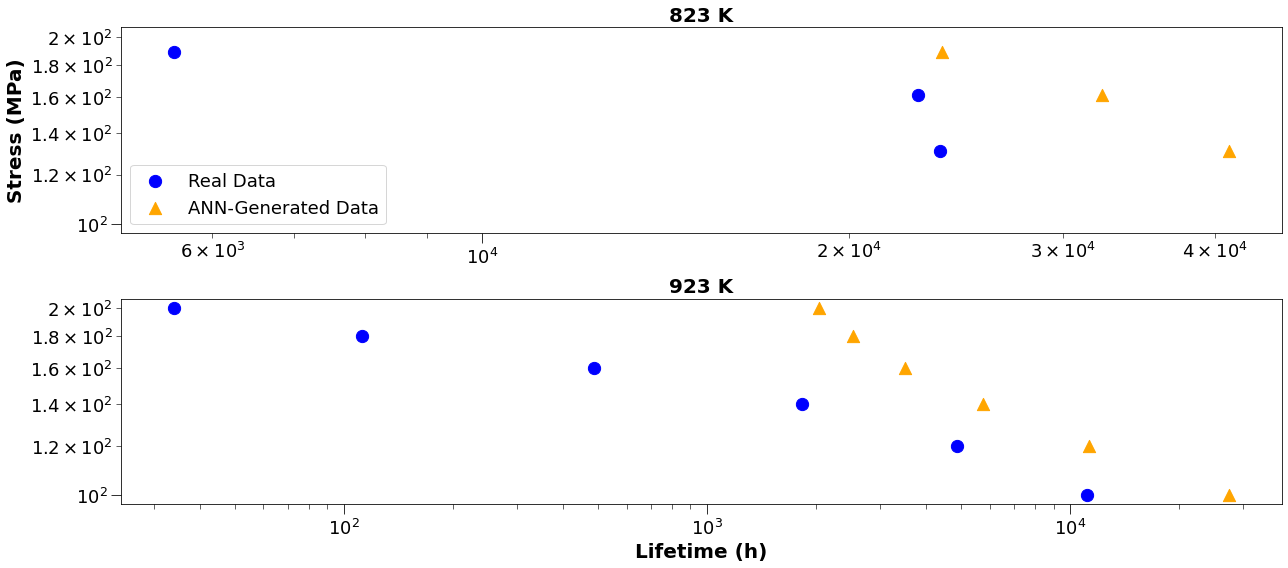

In [7]:
marker_size=150

fig, ax = plt.subplots(2, 1,figsize=(18,8),sharey=True)
ax[0].set_title('823 K',fontsize=20,fontweight='bold')
ax[0].scatter(paper_data1['T=823 K'],paper_data1['stress [MPa]'],s=marker_size,color='blue',label='Real Data')
ax[0].scatter(y=paper_data1['stress [MPa]'],x=paper_data1['T = 823 K (predicted)'],s=marker_size,marker="^",
              label='ANN-Generated Data',color='orange')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].tick_params(axis='both', which='major', labelsize=14,length=10)
ax[0].tick_params(axis='both', which='minor', labelsize=14,length=5,rotation=0)
ax[0].legend(fontsize=18,loc=3)

ax[1].set_title('923 K',fontsize=20,fontweight='bold')
ax[1].scatter(y=paper_data2['stress [MPa]'],x=paper_data2['T=923 K'],s=marker_size,color='blue')
ax[1].scatter(y=paper_data2['stress [MPa]'],x=paper_data2['T = 923 K (predicted)'],s=marker_size,marker="^",
             color='orange')

ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[0].tick_params(axis='both', which='major', labelsize=18,length=10)
ax[0].tick_params(axis='both', which='minor', labelsize=18,length=5)
ax[1].tick_params(axis='both', which='major', labelsize=18,length=10)
ax[1].tick_params(axis='both', which='minor', labelsize=18,length=5)

ax[0].set_ylabel('Stress (MPa)',fontsize=20,fontweight='bold')
ax[1].set_xlabel('Lifetime (h)',fontsize=20,fontweight='bold')
plt.tight_layout()
plt.savefig("ANNvsRealplots.png",dpi=500)

## Random Generated Data
##### Now let's check how the algorithm behaves for randomly generated data 

In [8]:
C1=np.random.uniform(0,0.23)
C2=np.random.uniform(0,0.23)
C3=np.random.uniform(0,0.23)
C4=np.random.uniform(0,0.23)
Si1=np.random.uniform(0,0.86)
Si2=np.random.uniform(0,0.86)
Si3=np.random.uniform(0,0.86)
Si4=np.random.uniform(0,0.86)
Mn1=np.random.uniform(0,0.92)
Mn2=np.random.uniform(0,0.92)
Mn3=np.random.uniform(0,0.92)
Mn4=np.random.uniform(0,0.92)
P1=np.random.uniform(0,0.029)
P2=np.random.uniform(0,0.029)
P3=np.random.uniform(0,0.029)
P4=np.random.uniform(0,0.029)
S1=np.random.uniform(0,0.02)
S2=np.random.uniform(0,0.02)
S3=np.random.uniform(0,0.02)
S4=np.random.uniform(0,0.02)
Cr1=np.random.uniform(2.165,12.9)
Cr2=np.random.uniform(2.165,12.9)
Cr3=np.random.uniform(2.165,12.9)
Cr4=np.random.uniform(2.165,12.9)
Mo1=np.random.uniform(0,2.99)
Mo2=np.random.uniform(0,2.99)
Mo3=np.random.uniform(0,2.99)
Mo4=np.random.uniform(0,2.99)
W1=np.random.uniform(0,3.93)
W2=np.random.uniform(0,3.93)
W3=np.random.uniform(0,3.93)
W4=np.random.uniform(0,3.93)
Ni1=np.random.uniform(0,2.9)
Ni2=np.random.uniform(0,2.9)
Ni3=np.random.uniform(0,2.9)
Ni4=np.random.uniform(0,2.9)
Cu1=np.random.uniform(0,0.87)
Cu2=np.random.uniform(0,0.87)
Cu3=np.random.uniform(0,0.87)
Cu4=np.random.uniform(0,0.87)
V1=np.random.uniform(0,0.28)
V2=np.random.uniform(0,0.28)
V3=np.random.uniform(0,0.28)
V4=np.random.uniform(0,0.28)
Nb1=np.random.uniform(0,0.312)
Nb2=np.random.uniform(0,0.312)
Nb3=np.random.uniform(0,0.312)
Nb4=np.random.uniform(0,0.312)
N1=np.random.uniform(0,0.165)
N2=np.random.uniform(0,0.165)
N3=np.random.uniform(0,0.165)
N4=np.random.uniform(0,0.165)
Al1=np.random.uniform(0,0.057)
Al2=np.random.uniform(0,0.057)
Al3=np.random.uniform(0,0.057)
Al4=np.random.uniform(0,0.057)
B1=np.random.uniform(0,0.051)
B2=np.random.uniform(0,0.051)
B3=np.random.uniform(0,0.051)
B4=np.random.uniform(0,0.051)
Co1=np.random.uniform(0,3.9)
Co2=np.random.uniform(0,3.9)
Co3=np.random.uniform(0,3.9)
Co4=np.random.uniform(0,3.9)
Ta1=np.random.uniform(0,0.18)
Ta2=np.random.uniform(0,0.18)
Ta3=np.random.uniform(0,0.18)
Ta4=np.random.uniform(0,0.18)
Re1=np.random.uniform(0,1.69)
Re2=np.random.uniform(0,1.69)
Re3=np.random.uniform(0,1.69)
Re4=np.random.uniform(0,1.69)
O1=np.random.uniform(0,0.035)
O2=np.random.uniform(0,0.035)
O3=np.random.uniform(0,0.035)
O4=np.random.uniform(0,0.035)
Temptemp1=np.random.uniform(823,1133)
Temptemp2=np.random.uniform(823,1133)
Temptemp3=np.random.uniform(823,1133)
Temptemp4=np.random.uniform(823,1133)
Temptime1=np.random.uniform(0.5,40)
Temptime2=np.random.uniform(0.5,40)
Temptime3=np.random.uniform(0.5,40)
Temptime4=np.random.uniform(0.5,40)
Tempcoo1=np.random.randint(0,4)
Tempcoo2=np.random.randint(0,4)
Tempcoo3=np.random.randint(0,4)
Tempcoo4=np.random.randint(0,4)
Normtemp1=np.random.uniform(800,1453)
Normtemp2=np.random.uniform(800,1453)
Normtemp3=np.random.uniform(800,1453)
Normtemp4=np.random.uniform(800,1453)
Normtime1=np.random.uniform(0,33)
Normtime2=np.random.uniform(0,33)
Normtime3=np.random.uniform(0,33)
Normtime4=np.random.uniform(0,33)
Normcoo1=np.random.randint(0,4)
Normcoo2=np.random.randint(0,4)
Normcoo3=np.random.randint(0,4)
Normcoo4=np.random.randint(0,4)
Anntemp1=np.random.uniform(800,1133)
Anntemp2=np.random.uniform(800,1133)
Anntemp3=np.random.uniform(800,1133)
Anntemp4=np.random.uniform(800,1133)
Anntime1=np.random.uniform(0,50)
Anntime2=np.random.uniform(0,50)
Anntime3=np.random.uniform(0,50)
Anntime4=np.random.uniform(0,50)
Anncoo1=np.random.randint(0,2)
Anncoo2=np.random.randint(0,2)
Anncoo3=np.random.randint(0,2)
Anncoo4=np.random.randint(0,2)
#--
random1=[C1,Si1,Mn1,P1,S1,Cr1,Mo1,W1,Ni1,Cu1,V1,Nb1,N1,Al1,B1,Co1,Ta1, Re1, O1,Temptemp1, Temptime1,Tempcoo1,
        Normtemp1,Normtime1,Normcoo1,Anntemp1,Anntime1,Anncoo1]
random2=[C2,Si2,Mn2,P2,S2,Cr2,Mo2,W2,Ni2,Cu2,V2,Nb2,N2,Al2,B2,Co2,Ta2, Re2, O2,Temptemp2, Temptime2,Tempcoo2,
        Normtemp2,Normtime2,Normcoo2,Anntemp2,Anntime2,Anncoo2]
random3=[C3,Si3,Mn3,P3,S3,Cr3,Mo3,W3,Ni3,Cu3,V3,Nb3,N3,Al3,B3,Co3,Ta3, Re3, O3, Temptemp3,Temptime3,Tempcoo3,
        Normtemp3,Normtime3,Normcoo3,Anntemp3,Anntime3,Anncoo3]
random4=[C4,Si4,Mn4,P4,S4,Cr4,Mo4,W4,Ni4,Cu4,V4,Nb4,N4,Al4,B4,Co4,Ta4, Re4, O4,Temptemp4, Temptime4,Tempcoo4,
        Normtemp4,Normtime4,Normcoo4,Anntemp4,Anntime4,Anncoo4]
randomdata=pd.DataFrame({'input':['C','Si','Mn','P','S','Cr','Mo','W','Ni','Cu','V',
                                  'Nb','N','Al','B','Co','Ta', 'Re', 'O','Temptemp','Temptime','Tempcoo',
                                    'Normtemp','Normtime','Normcoo','Anntemp','Anntime','Anncoo'],
                        'pseudodata1':random1,'pseudodata2':random2,'pseudodata3':random3,'pseudodata4':random4})
randomdata.to_excel('random_data.xlsx')

In [9]:
random1=[C1,Si1,Mn1,P1,S1,Cr1,Mo1,W1,Ni1,Cu1,V1,Nb1,N1,Al1,B1,Co1,Ta1, Re1, O1,Temptemp1, Temptime1,Tempcoo1,
        Normtemp1,Normtime1,Normcoo1,Anntemp1,Anntime1,Anncoo1]
random2=[C2,Si2,Mn2,P2,S2,Cr2,Mo2,W2,Ni2,Cu2,V2,Nb2,N2,Al2,B2,Co2,Ta2, Re2, O2,Temptemp2, Temptime2,Tempcoo2,
        Normtemp2,Normtime2,Normcoo2,Anntemp2,Anntime2,Anncoo2]
random3=[C3,Si3,Mn3,P3,S3,Cr3,Mo3,W3,Ni3,Cu3,V3,Nb3,N3,Al3,B3,Co3,Ta3, Re3, O3, Temptemp3,Temptime3,Tempcoo3,
        Normtemp3,Normtime3,Normcoo3,Anntemp3,Anntime3,Anncoo3]
random4=[C4,Si4,Mn4,P4,S4,Cr4,Mo4,W4,Ni4,Cu4,V4,Nb4,N4,Al4,B4,Co4,Ta4, Re4, O4,Temptemp4, Temptime4,Tempcoo4,
        Normtemp4,Normtime4,Normcoo4,Anntemp4,Anntime4,Anncoo4]
randomdata=pd.DataFrame({'input':['C','Si','Mn','P','S','Cr','Mo','W','Ni','Cu','V',
                                  'Nb','N','Al','B','Co','Ta', 'Re', 'O','Temptemp','Temptime','Tempcoo',
                                    'Normtemp','Normtime','Normcoo','Anntemp','Anntime','Anncoo'],
                        'pseudodata1':random1,'pseudodata2':random2,'pseudodata3':random3,'pseudodata4':random4})
randomdata.to_excel('random_data.xlsx')

In [10]:
randomdata

,input,pseudodata1,pseudodata2,pseudodata3,pseudodata4
0,C,0.064285,0.190235,0.184491,0.042429
1,Si,0.706882,0.358567,0.235857,0.027008
2,Mn,0.197058,0.831510,0.273590,0.620475
3,P,0.000256,0.021900,0.000083,0.000062
4,S,0.014697,0.013225,0.018775,0.016264
5,Cr,10.113847,10.623775,3.400944,3.986633
6,Mo,2.338712,1.411590,0.563426,1.665499
7,W,0.332638,1.334667,1.500371,3.787182
8,Ni,2.315403,2.868404,2.899432,1.335139
9,Cu,0.140278,0.598417,0.347909,0.730964


In [11]:
stress=range(20,540,40)
creep_pseudodata=pd.DataFrame({'stress':stress})
creep_pseudodata2=pd.DataFrame({'stress':stress})
creep_pseudodata3=pd.DataFrame({'stress':stress})
creep_pseudodata4=pd.DataFrame({'stress':stress})
for j in range (723,1023,50):
    lifetime=[]
    lifetime2=[]
    lifetime3=[]
    lifetime4=[]
    for i in stress:
        #1
        prediction=lifetime_predictor(stress=i,temperature=j,C=C1,
                  Si=Si1,Mn=Mn1, P=P1, S=S1,Cr=Cr1,
                   Mo=Mo1,W=W1,Ni=Ni1, Cu=Cu1,V=V1,
                   Nb=Nb1,N=N1,Al=Al1,B=B1,Co=Co1,
                   Ta=Ta1,Re=Re1,O=O1,Temptemp=Temptemp1,Temptime=Temptime1, Tempcoo=Tempcoo1,
                    Normtemp=Normtemp1,Normtime=Normtime1,Normcoo=Normcoo1,Anntemp=Anntemp1,
                    Anntime=Anntime1,Anncoo=Anncoo1)
        lifetime.append(prediction)
        #2
        prediction2=lifetime_predictor(stress=i,temperature=j,C=C2,
                  Si=Si2,Mn=Mn2, P=P2, S=S2,Cr=Cr2,
                   Mo=Mo2,W=W2,Ni=Ni2, Cu=Cu2,V=V2,
                   Nb=Nb2,N=N2,Al=Al2,B=B2,Co=Co2,
                   Ta=Ta2,Re=Re2,O=O2,Temptemp=Temptemp2,Temptime=Temptime2, Tempcoo=Tempcoo2,
                    Normtemp=Normtemp2,Normtime=Normtime2,Normcoo=Normcoo2,Anntemp=Anntemp2,
                    Anntime=Anntime2,Anncoo=Anncoo2)
        lifetime2.append(prediction2)
        #3
        prediction3=lifetime_predictor(stress=i,temperature=j,C=C3,
                  Si=Si3,Mn=Mn3, P=P3, S=S3,Cr=Cr3,
                   Mo=Mo3,W=W3,Ni=Ni3, Cu=Cu3,V=V3,
                   Nb=Nb3,N=N3,Al=Al3,B=B3,Co=Co3,
                   Ta=Ta3,Re=Re3,O=O3,Temptemp=Temptemp3,Temptime=Temptime3, Tempcoo=Tempcoo3,
                    Normtemp=Normtemp3,Normtime=Normtime3,Normcoo=Normcoo3,Anntemp=Anntemp3,
                    Anntime=Anntime3,Anncoo=Anncoo3)
        lifetime3.append(prediction3)
        #4
        prediction4=lifetime_predictor(stress=i,temperature=j,C=C4,
                  Si=Si4,Mn=Mn4, P=P4, S=S4,Cr=Cr4,
                   Mo=Mo4,W=W4,Ni=Ni4, Cu=Cu4,V=V4,
                   Nb=Nb4,N=N4,Al=Al4,B=B4,Co=Co4,
                   Ta=Ta4,Re=Re4,O=O4,Temptemp=Temptemp4,Temptime=Temptime4, Tempcoo=Tempcoo4,
                    Normtemp=Normtemp4,Normtime=Normtime4,Normcoo=Normcoo4,Anntemp=Anntemp4,
                    Anntime=Anntime4,Anncoo=Anncoo4)
        lifetime4.append(prediction4)
    creep_pseudodata['T = {} K'.format(j)]=lifetime
    creep_pseudodata2['T = {} K'.format(j)]=lifetime2
    creep_pseudodata3['T = {} K'.format(j)]=lifetime3
    creep_pseudodata4['T = {} K'.format(j)]=lifetime4

In [12]:
creep_pseudodata

,stress,T = 723 K,T = 773 K,T = 823 K,T = 873 K,T = 923 K,T = 973 K
0,20,332629,279783,219910,155056,93351,38029
1,60,259463,191262,126453,75564,30395,10049
2,100,182306,119302,66740,24840,6674,2269
3,140,125323,72730,27176,6423,0,0
4,180,86881,36077,10560,0,0,0
5,220,51551,15723,0,0,0,0
6,260,28218,5151,0,0,0,0
7,300,13935,0,0,0,0,0
8,340,4761,0,0,0,0,0
9,380,0,0,0,0,0,0


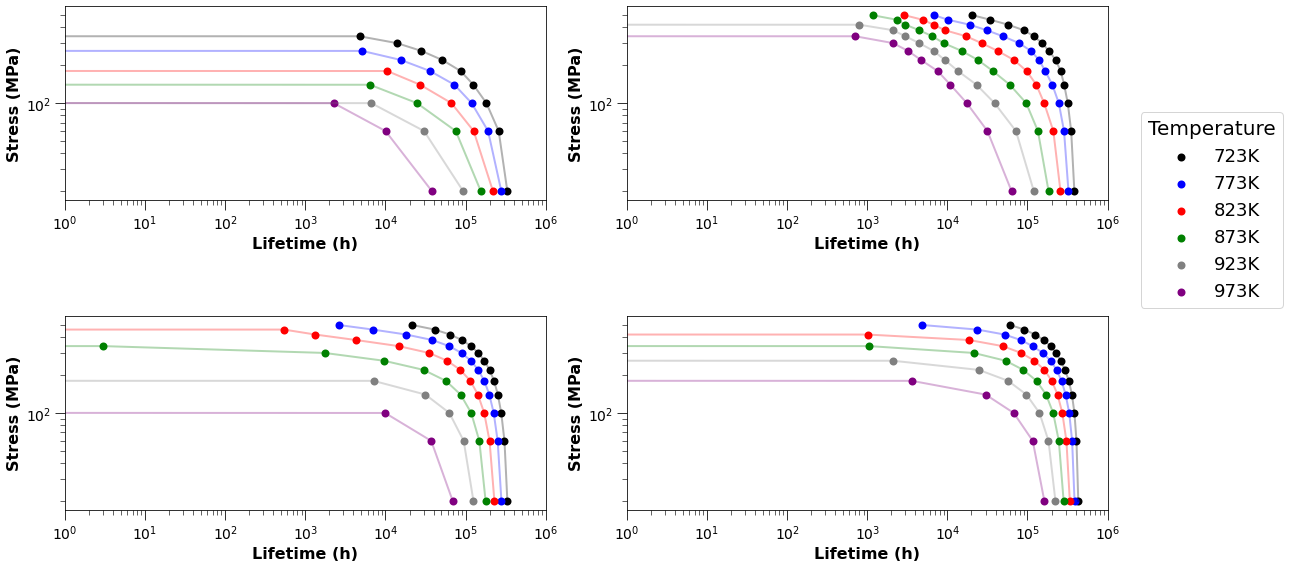

In [13]:
fig, ax = plt.subplots(2, 2,figsize=(18,8))
##1st plot ##
#723 K
l0=ax[0,0].scatter(creep_pseudodata['T = 723 K'],creep_pseudodata['stress'], color='black', lw=2)
ax[0,0].plot(creep_pseudodata['T = 723 K'],creep_pseudodata['stress'], color='black', lw=2, alpha=0.3)
#T=773 K
l1=ax[0,0].scatter(creep_pseudodata['T = 773 K'],creep_pseudodata['stress'], color='blue', lw=2)
ax[0,0].plot(creep_pseudodata['T = 773 K'],creep_pseudodata['stress'], color='blue', lw=2, alpha=0.3,label='773K')
#823
l2=ax[0,0].scatter(creep_pseudodata['T = 823 K'],creep_pseudodata['stress'], color='red', lw=2)
ax[0,0].plot(creep_pseudodata['T = 823 K'],creep_pseudodata['stress'], color='red', lw=2, alpha=0.3,label='823K')
#873
l3=ax[0,0].scatter(creep_pseudodata['T = 873 K'],creep_pseudodata['stress'], color='green', lw=2)
ax[0,0].plot(creep_pseudodata['T = 873 K'],creep_pseudodata['stress'], color='green', lw=2, alpha=0.3,label='873K')
#923
l4=ax[0,0].scatter(creep_pseudodata['T = 923 K'],creep_pseudodata['stress'], color='gray', lw=2)
ax[0,0].plot(creep_pseudodata['T = 923 K'],creep_pseudodata['stress'], color='gray', lw=2, alpha=0.3,label='923K')
#973
l5=ax[0,0].scatter(creep_pseudodata['T = 973 K'],creep_pseudodata['stress'], color='purple', lw=2)
ax[0,0].plot(creep_pseudodata['T = 973 K'],creep_pseudodata['stress'], color='purple', lw=2, alpha=0.3,label='973K')
## 2nd plot ##
#723
ax[1,0].scatter(creep_pseudodata2['T = 723 K'],creep_pseudodata2['stress'], color='black', lw=2)
ax[1,0].plot(creep_pseudodata2['T = 723 K'],creep_pseudodata2['stress'], color='black', lw=2, alpha=0.3)
#773
ax[1,0].scatter(creep_pseudodata2['T = 773 K'],creep_pseudodata2['stress'], color='blue', lw=2)
ax[1,0].plot(creep_pseudodata2['T = 773 K'],creep_pseudodata2['stress'], color='blue', lw=2, alpha=0.3)
#823
ax[1,0].scatter(creep_pseudodata2['T = 823 K'],creep_pseudodata2['stress'], color='red', lw=2)
ax[1,0].plot(creep_pseudodata2['T = 823 K'],creep_pseudodata2['stress'], color='red', lw=2, alpha=0.3)
#873
ax[1,0].scatter(creep_pseudodata2['T = 873 K'],creep_pseudodata2['stress'], color='green', lw=2)
ax[1,0].plot(creep_pseudodata2['T = 873 K'],creep_pseudodata2['stress'], color='green', lw=2, alpha=0.3)
#923
ax[1,0].scatter(creep_pseudodata2['T = 923 K'],creep_pseudodata2['stress'], color='gray', lw=2)
ax[1,0].plot(creep_pseudodata2['T = 923 K'],creep_pseudodata2['stress'], color='gray', lw=2, alpha=0.3)
#973
ax[1,0].scatter(creep_pseudodata2['T = 973 K'],creep_pseudodata['stress'], color='purple', lw=2)
ax[1,0].plot(creep_pseudodata2['T = 973 K'],creep_pseudodata['stress'], color='purple', lw=2, alpha=0.3)
## 3rd plot ##
#723
ax[0,1].scatter(creep_pseudodata3['T = 723 K'],creep_pseudodata3['stress'], color='black', lw=2)
ax[0,1].plot(creep_pseudodata3['T = 723 K'],creep_pseudodata3['stress'], color='black', lw=2, alpha=0.3)
#773
ax[0,1].scatter(creep_pseudodata3['T = 773 K'],creep_pseudodata3['stress'], color='blue', lw=2)
ax[0,1].plot(creep_pseudodata3['T = 773 K'],creep_pseudodata3['stress'], color='blue', lw=2, alpha=0.3)
#823
ax[0,1].scatter(creep_pseudodata3['T = 823 K'],creep_pseudodata3['stress'], color='red', lw=2)
ax[0,1].plot(creep_pseudodata3['T = 823 K'],creep_pseudodata3['stress'], color='red', lw=2, alpha=0.3,)
#873
ax[0,1].scatter(creep_pseudodata3['T = 873 K'],creep_pseudodata3['stress'], color='green', lw=2)
ax[0,1].plot(creep_pseudodata3['T = 873 K'],creep_pseudodata3['stress'], color='green', lw=2, alpha=0.3)
#923
ax[0,1].scatter(creep_pseudodata3['T = 923 K'],creep_pseudodata3['stress'], color='gray', lw=2)
ax[0,1].plot(creep_pseudodata3['T = 923 K'],creep_pseudodata3['stress'], color='gray', lw=2, alpha=0.3)
#973
ax[0,1].scatter(creep_pseudodata3['T = 973 K'],creep_pseudodata3['stress'], color='purple', lw=2)
ax[0,1].plot(creep_pseudodata3['T = 973 K'],creep_pseudodata3['stress'], color='purple', lw=2, alpha=0.3)

## 4th plot #
#723
ax[1,1].scatter(creep_pseudodata4['T = 723 K'],creep_pseudodata4['stress'], color='black', lw=2)
ax[1,1].plot(creep_pseudodata4['T = 723 K'],creep_pseudodata4['stress'], color='black', lw=2, alpha=0.3)
#773
ax[1,1].scatter(creep_pseudodata4['T = 773 K'],creep_pseudodata4['stress'], color='blue', lw=2)
ax[1,1].plot(creep_pseudodata4['T = 773 K'],creep_pseudodata4['stress'], color='blue', lw=2, alpha=0.3)
#823
ax[1,1].scatter(creep_pseudodata4['T = 823 K'],creep_pseudodata4['stress'], color='red', lw=2)
ax[1,1].plot(creep_pseudodata4['T = 823 K'],creep_pseudodata4['stress'], color='red', lw=2, alpha=0.3)
#873
ax[1,1].scatter(creep_pseudodata4['T = 873 K'],creep_pseudodata4['stress'], color='green', lw=2)
ax[1,1].plot(creep_pseudodata4['T = 873 K'],creep_pseudodata4['stress'], color='green', lw=2, alpha=0.3)
#923
ax[1,1].scatter(creep_pseudodata4['T = 923 K'],creep_pseudodata4['stress'], color='gray', lw=2)
ax[1,1].plot(creep_pseudodata4['T = 923 K'],creep_pseudodata4['stress'], color='gray', lw=2, alpha=0.3)
#973
ax[1,1].scatter(creep_pseudodata4['T = 973 K'],creep_pseudodata4['stress'], color='purple', lw=2)
ax[1,1].plot(creep_pseudodata4['T = 973 K'],creep_pseudodata4['stress'], color='purple', lw=2, alpha=0.3)
for i in [0,1]:
    for j in [0,1]:
        ax[i,j].set_yscale('log')
        ax[i,j].tick_params(axis='both', which='major', labelsize=14,length=10)
        ax[i,j].tick_params(axis='both', which='minor', labelsize=14,length=5,rotation=0)
        ax[i,j].set_xscale('log')
        ax[i,j].set_xlabel('Lifetime (h)',fontsize=16,fontweight='bold')
        ax[i,j].set_ylabel('Stress (MPa)',fontsize=16,fontweight='bold')
        ax[i,j].set_xlim(1,10E5)
ax[0,1].legend([l0,l1, l2, l3,l4,l5],["723K","773K", "823K", "873K","923K","973K"],
               bbox_to_anchor=(1.05, .5),title="Temperature",
               title_fontsize=20,fontsize=18)
plt.tight_layout()
plt.savefig("randomdata.png",dpi=500)
plt.show()